## Data Description

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://www.earthdata.nasa.gov/data/catalog/lancemodis-mcd14dl-6.1nrt?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMSkillsNetworkDV0101ENCoursera2761-2023-01-01).

The dataset includes the following variables:

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline
import requests
import io
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
resp = requests.get(URL)
text = io.StringIO(resp.text)

fire_data =  pd.read_csv(text,encoding = "ISO-8859-1")

In [ ]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               26406 non-null  object 
 1   Date                                 26406 non-null  object 
 2   Estimated_fire_area                  26406 non-null  float64
 3   Mean_estimated_fire_brightness       26406 non-null  float64
 4   Mean_estimated_fire_radiative_power  26406 non-null  float64
 5   Mean_confidence                      26406 non-null  float64
 6   Std_confidence                       24199 non-null  float64
 7   Var_confidence                       24199 non-null  float64
 8   Count                                26406 non-null  int64  
 9   Replaced                             26406 non-null  object 
 10  Year                                 26406 non-null  int32  
 11  Month                       

In [ ]:
#extract 'Year' and 'Month' from Date and include in the dataframe as separate columns
fire_data['Year'] = pd.to_datetime(fire_data['Date']).dt.year
fire_data['Month'] = pd.to_datetime(fire_data['Date']).dt.month

In [ ]:
print(fire_data.isnull().sum())

###Understand the change in average estimated fire area over time (year) and change in average estimated fire area between 2010-2013 grouped by months

In [ ]:
df_line1=fire_data.groupby('Year')['Estimated_fire_area'].mean()
df_line1.head()

,Estimated_fire_area
Year,
2005,92.770501
2006,176.289434
2007,153.112464
2008,99.758968
2009,141.624955


In [ ]:
peak_years=[2010,2011,2012,2013]
filtered_df=fire_data[fire_data['Year'].isin(peak_years)]
df_line2=filtered_df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_line2.head()

Year  Month
2010  1        53.430312
      2        66.264381
      3        34.694920
      4        43.528625
      5        49.347853
Name: Estimated_fire_area, dtype: float64

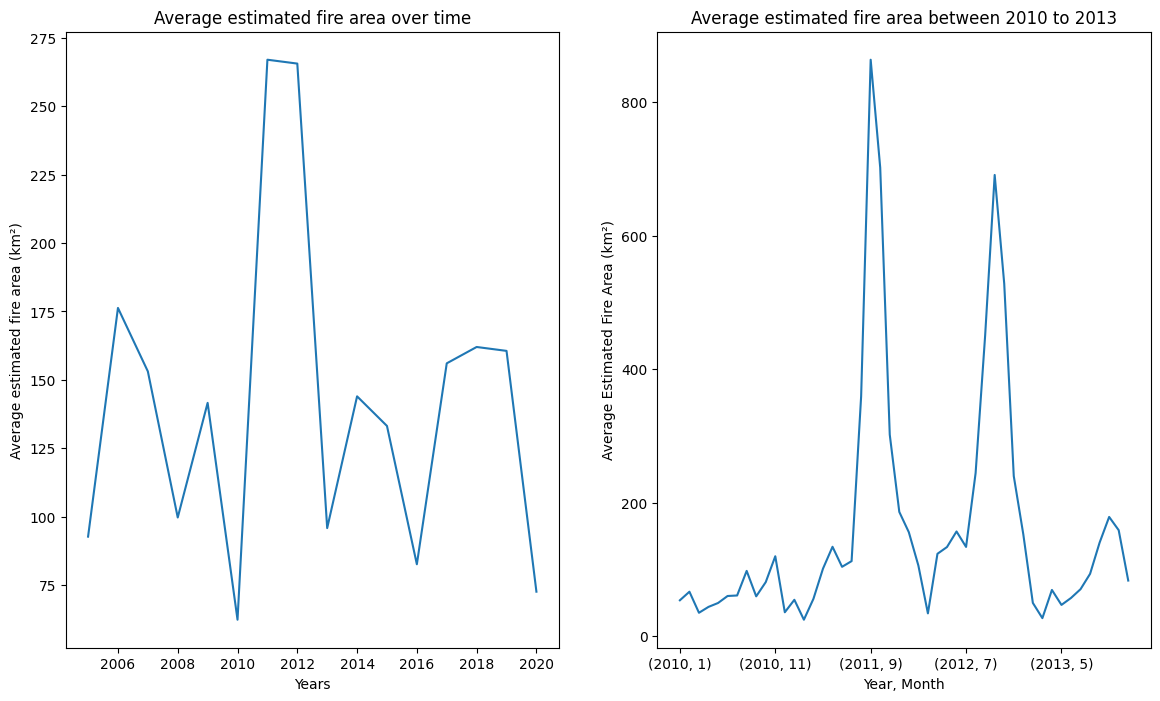

In [ ]:
fig = plt.figure() # create figure

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Subplot 1: Line plot - Average estimated fire area over time (years)
df_line1.plot(kind='line', ax=ax1)

ax1.set_title('Average estimated fire area over time')
ax1.set_ylabel('Average estimated fire area (km²)')
ax1.set_xlabel('Years')


# Subplot 2: Line plot - Average estimated fire area between 2010-2013 (years,moths)
df_line2.plot(x=df_line2.index, y=df_line2.values, figsize=(14, 8), ax=ax2)
ax2.set_xlabel('Year, Month')
ax2.set_ylabel('Average Estimated Fire Area (km²)')
ax2.set_title('Average estimated fire area between 2010 to 2013')


plt.show()

####I noticed the peak in the plot between 2010 to 2013 and in the second plot I narrow down the finding, by plotting the estimated fire area for year grouped together with month.

###Let's have an insight on the distribution of mean estimated fire brightness across the regions

In [ ]:
#regions mentioned in the dataset
fire_data['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

In [ ]:
df_bar=fire_data.groupby('Region')['Mean_estimated_fire_brightness'].mean().reset_index()
df_bar.head(8)

,Region,Mean_estimated_fire_brightness
0,NSW,315.526218
1,NT,322.898453
2,QL,318.364434
3,SA,321.497609
4,TA,313.368483
5,VI,315.029792
6,WA,324.142246


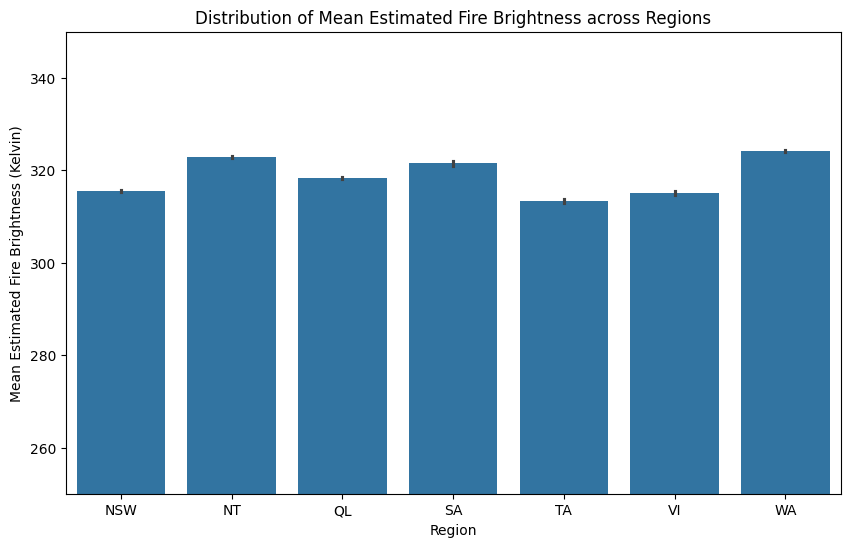

In [ ]:
plt.figure(figsize=(10, 6))
# Using seaborn's barplot function to create the plot
sns.barplot(data=fire_data, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.ylim(250,350)
plt.show()

###Find the portion of count of pixels for presumed vegetation fires vary across regions

In [ ]:
df_pie=fire_data.groupby('Region')['Count'].sum().reset_index()
df_pie=df_pie.sort_values('Count',ascending=False)
df_pie.head()

,Region,Count
1,NT,649430
6,WA,615968
2,QL,420882
0,NSW,117412
5,VI,52473


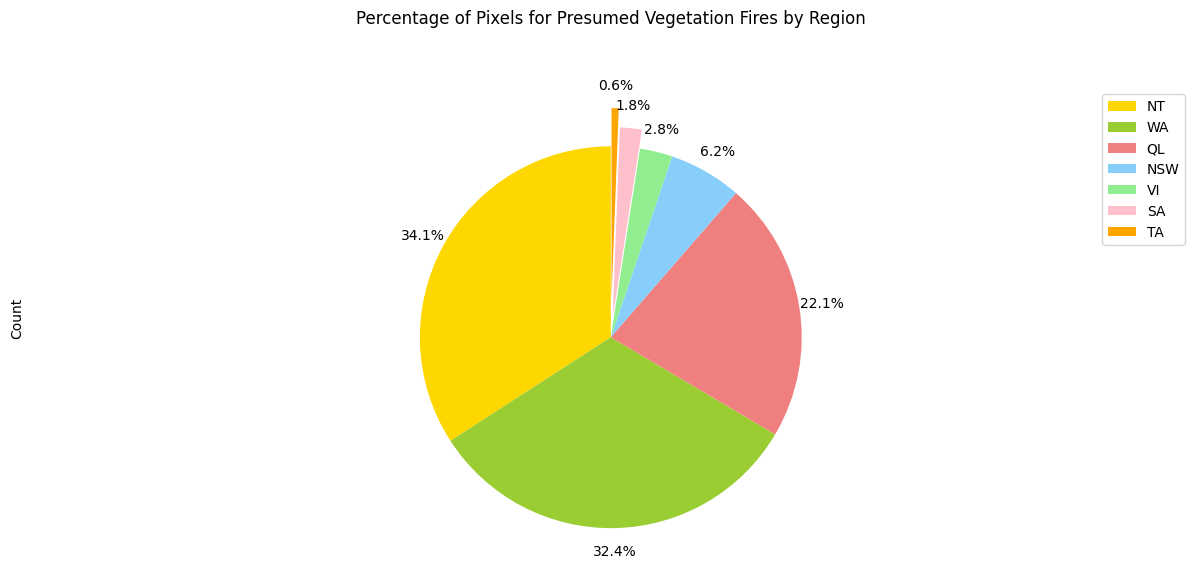

In [ ]:
df_pie=fire_data.groupby('Region')['Count'].sum().reset_index()
df_pie=df_pie.sort_values('Count',ascending=False)

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','orange']
explode_list = [0, 0, 0, 0, 0, 0.1, 0.2] # ratio for each region with which to offset each wedge.

df_pie['Count'].plot(kind='pie', autopct='%1.1f%%',
                     figsize=(15,6), colors=colors_list, explode=explode_list,
                     startangle=90, shadow=False, labels=None, pctdistance=1.12)

# scale the title up by 12% to match pctdistance
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region', y=1.12)
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_pie['Region'], loc='upper right')

plt.show()

###Develop a histogram of the mean estimated fire brightness

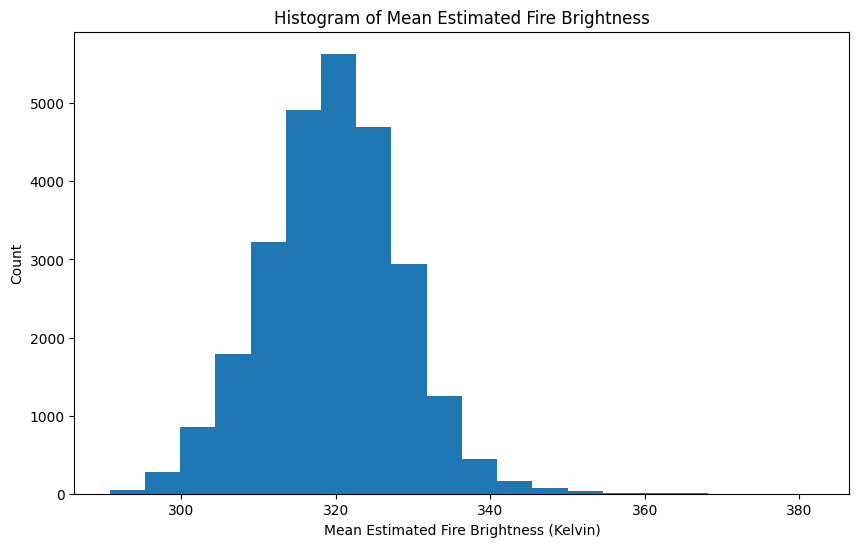

In [ ]:
plt.figure(figsize=(10, 6))
# Using plt.hist to create the histogram
# Setting the number of bins to 20 for better visualization
plt.hist(x=fire_data['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

###Understand the distribution of estimated fire brightness across regions

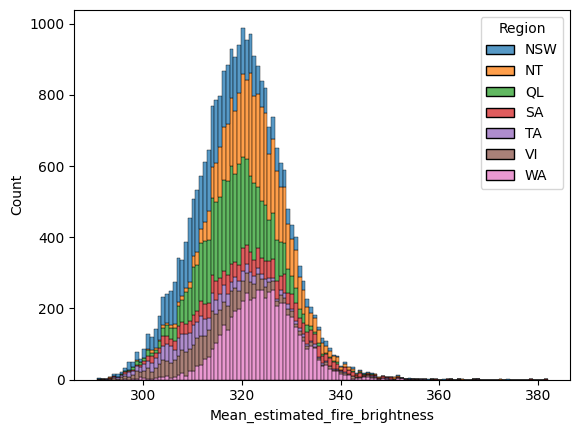

In [ ]:
# Creating a histogram to visualize the distribution of mean estimated fire brightness across regions using Seaborn
# Using sns.histplot to create the histogram
# Specifying the DataFrame (data=df) and the column for the x-axis (x='Mean_estimated_fire_brightness')
# Adding hue='Region' to differentiate the distribution across regions
sns.histplot(data=fire_data, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

###Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level

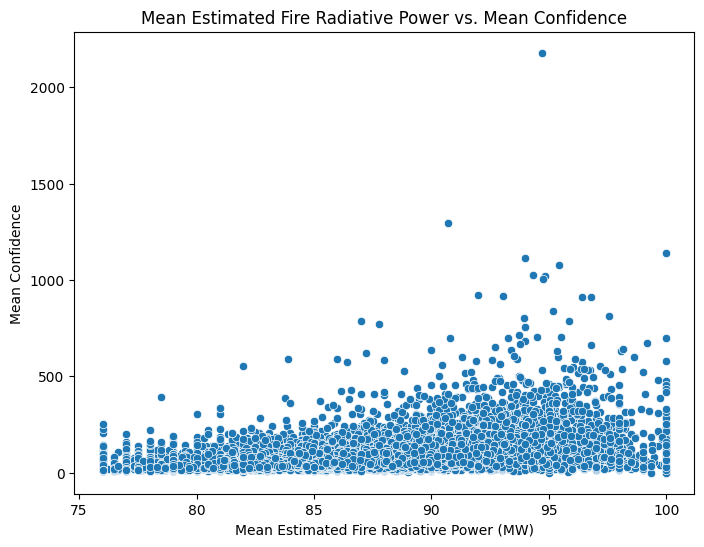

In [ ]:
# Creating a scatter plot to visualize the relationship between mean estimated fire radiative power and mean  confidence using Seaborn
plt.figure(figsize=(8, 6))
# Using sns.scatterplot to create the scatter plot
# Specifying the DataFrame (data=df) and the columns for the x-axis (x='Mean_confidence') and y-axis            (y='Mean_estimated_fire_radiative_power')
sns.scatterplot(data=fire_data, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

###Let's mark these seven regions on the Map of Australia using Folium

we have created a dataframe containing the regions, their latitudes and longitudes.
For australia: [-25, 135] as location to create the map

In [ ]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411],
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [ ]:
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)